In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = np.array(np.loadtxt("enrollmentzipcode.tsv", delimiter = '\t', skiprows = 1, dtype = "str"))

In [3]:
manoaMask = np.array(np.zeros(len(data)))
leewardMask = np.array(np.zeros(len(data)))


for i in range(len(data)):
    if data[i][2] == 'University of Hawai`i at Manoa':
        manoaMask[i] = 1
    if data[i][2] == 'Leeward Community College':
        leewardMask[i] = 1

manoaMask = np.array(manoaMask, dtype=bool)
leewardMask = np.array(leewardMask, dtype=bool)

manoaData = data[manoaMask, :]
leewardData = data[leewardMask, :]

In [4]:
def yearTotal(data, yearStr):
    sum = 0
    for i in range(len(data)):
        if yearStr == data[i, 0]:
            sum += int(data[i, 4])
    return sum

manoaYears = np.array(np.zeros((11)))
leewardYears = np.array(np.zeros((11)))
yearsStr = np.array(["Fall 2012", "Fall 2013", "Fall 2014", "Fall 2015", "Fall 2016", "Fall 2017", "Fall 2018", "Fall 2019", "Fall 2020", "Fall 2021", "Fall 2022"])

for i in range(11):
    manoaYears[i] = yearTotal(manoaData, yearsStr[i])
    leewardYears[i] = yearTotal(leewardData, yearsStr[i])

I used two masks to reduce the initial data down to two arrays, one for UH Manoa and one for Leeward Community College. I then wrote a function to get the sum of all enrollments for one year, and called that in a for loop to populate new arrays with the total number of enrollments each year at each institution.

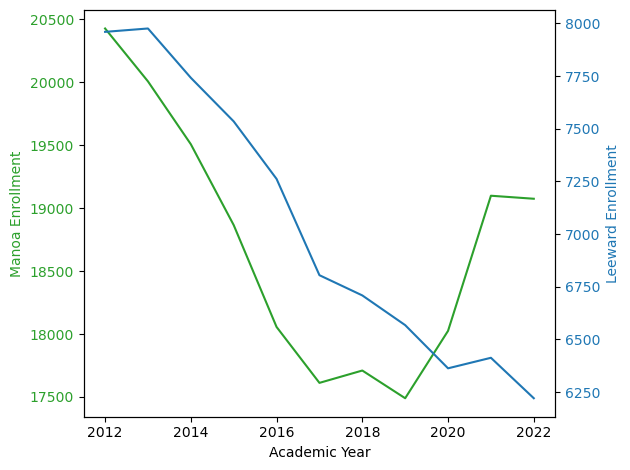

In [5]:
years = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Academic Year')
ax1.set_ylabel('Manoa Enrollment', color=color)
ax1.plot(years, manoaYears, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Leeward Enrollment', color=color)
ax2.plot(years, leewardYears, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

I decided to display the two institutions' data together to make them easier to compare. I also used different scales for the y-axis because otherwise a lot of detail would not be visible due to the difference in enrollment between the two. Finally, I chose the colors based on their associations, because each institution's website features their respective color prominently.

Enrollment had been steadily decreasing at both institutions until 2019, after which enrollment at UH Manoa increased sharply until 2021. I would assume any drastic changes at this time would be due to the COVID-19 pandemic, but I would have expected to see enrollment decrease, not increase. During this period at Leeward CC, however, enrollment continued to decrease overall.

In [6]:
manoaHawMask = np.array(np.zeros(len(manoaData)))
leewardHawMask = np.array(np.zeros(len(leewardData)))

for i in range(len(manoaData)):
    if manoaData[i][3] == "HAWAIIAN":
        manoaHawMask[i] = 1

for i in range(len(leewardData)):
    if leewardData[i][3] == "HAWAIIAN":
        leewardHawMask[i] = 1

manoaHawMask = np.array(manoaHawMask, dtype=bool)
leewardHawMask = np.array(leewardHawMask, dtype=bool)

manoaHawData = manoaData[manoaHawMask, :]
leewardHawData = leewardData[leewardHawMask, :]

manoaSum = np.sum((manoaData[:, 4]).astype(int))
manoaHawSum = np.sum((manoaHawData[:, 4]).astype(int))
leewardSum = np.sum((leewardData[:, 4]).astype(int))
leewardHawSum = np.sum((leewardHawData[:, 4]).astype(int))

As before, I used masks to isolate rows with "HAWAIIAN" in order to create new arrays with only those entries. I then summed the enrollment counts in those new arrays in order to get the total number of Hawaiian students, and also summed over the inital arrays to get the total number of all students.

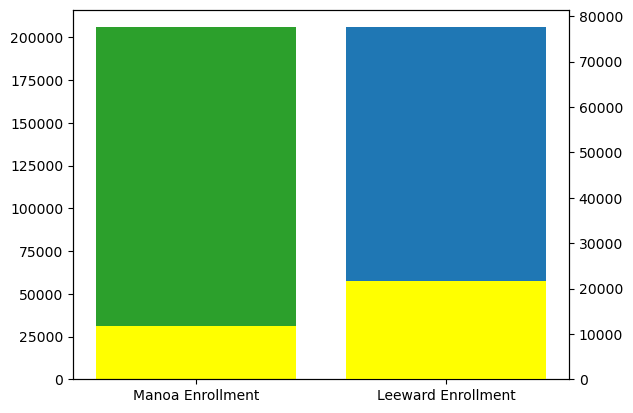

In [11]:
fig, ax1 = plt.subplots()

ax1.bar(1, manoaSum, color = 'tab:green')
ax1.bar(1, manoaHawSum, color = 'yellow')

ax2 = ax1.twinx()

ax2.bar(2, leewardSum, color = 'tab:blue')
ax2.bar(2, leewardHawSum, color = 'yellow')

ax1.set_xticks([1, 2])
ax1.set_xticklabels(["Manoa Enrollment", "Leeward Enrollment"])
plt.show()

I used two different y-scales so that the proportions of students with Native Hawaiian ancestry relative to the totals could be more easily compared between the two institutions. As before, green and blue represent UH Manoa and Leeward CC, respectively. The yellow parts of the bars show the number of Hawaiian students at each school.

These results show that there is a higher percentage of Hawaiian students at Leeward CC than at UH Manoa. This is not surprising, since UH Manoa is the flagship campus and has many more transfer students from out of state.